In [21]:
require(data.table)
require(ggplot2)
require(reshape2)

In [22]:
inDB = data.table(read.csv("adverity.csv"))
inDB[is.na(inDB)] <- 0
inDB$Daily = as.Date(inDB$Daily, format = "%m/%d/%Y")

inDB$Month = format(inDB$Daily, format="%Y-%m")

In [23]:
inDB

Datasource,Daily,Campaign.Name,Brand,Platform.Cost....,Impressions,Clicks,Video.Completions,Engagements,Video.Views,Month
<chr>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Facebook Ads Insights,2019-01-08,MCMMIA_2019_Several_Kelloggs_Corporate Promotions_Seasonal_Buenas Noticias_Facebook_Facebook_Brand Awareness_CPM_Enero,<undefined>,0.00,0,0,0,0,0,2019-01
Facebook Ads Insights,2019-01-08,MCMMIA_2019_SEVERAL_KELLOGGS_CORPORATEPROMOTIONS_SEASONAL_BUENASNOTICIAS_FACEBOOK_FACEBOOK_BRANDAWARENESS_CPM_ENERO,Corporate Promotions,29.61,241716,476,37,460,227,2019-01
Facebook Ads Insights,2019-01-09,MCMMIA_2019_Several_Kelloggs_Corporate Promotions_Seasonal_Buenas Noticias_Facebook_Facebook_Brand Awareness_CPM_Enero,<undefined>,0.00,0,0,0,0,0,2019-01
Facebook Ads Insights,2019-01-09,MCMMIA_2019_SEVERAL_KELLOGGS_CORPORATEPROMOTIONS_SEASONAL_BUENASNOTICIAS_FACEBOOK_FACEBOOK_BRANDAWARENESS_CPM_ENERO,Corporate Promotions,94.77,658498,1522,248,2604,1807,2019-01
Facebook Ads Insights,2019-01-10,MCMMIA_2019_Several_Kelloggs_Corporate Promotions_Seasonal_Buenas Noticias_Facebook_Facebook_Brand Awareness_CPM_Enero,<undefined>,0.00,0,0,0,0,0,2019-01
Facebook Ads Insights,2019-01-10,MCMMIA_2019_SEVERAL_KELLOGGS_CORPORATEPROMOTIONS_SEASONAL_BUENASNOTICIAS_FACEBOOK_FACEBOOK_BRANDAWARENESS_CPM_ENERO,Corporate Promotions,95.34,497346,1130,154,1511,892,2019-01
Facebook Ads Insights,2019-01-11,MCMMIA_2019_MEX_Kelloggs_Kashi_Seasonal_Kashi_Facebook_Facebook_Brand Awareness_CPM_Enero,<undefined>,0.00,0,0,0,0,0,2019-01
Facebook Ads Insights,2019-01-11,MCMMIA_2019_MEX_KELLOGGS_KASHI_SEASONAL_KASHI_FACEBOOK_FACEBOOK_BRANDAWARENESS_CPM_ENERO,Kashi,89.22,558973,1776,571,7568,7533,2019-01
Facebook Ads Insights,2019-01-11,MCMMIA_2019_Several_Kelloggs_Corporate Promotions_Seasonal_Buenas Noticias_Facebook_Facebook_Brand Awareness_CPM_Enero,<undefined>,0.00,0,0,0,0,0,2019-01


In [24]:
get_country = function(camp){
    s = strsplit(camp, "_")[[1]][3]
    return(s)
}
inDB$Country = apply(inDB[,"Campaign.Name"], 1, get_country)
inDB[Country == "Brasil", Country:= "BRA"]
inDB = inDB[!is.na(Country)]
inDB = inDB[Platform.Cost.... > 0]
country_list = inDB[, .(.N), by = Country]$Country
country_list

[1] "SEVERAL"      "MEX"          "ANDINO"       "CENAM"        "MERCOSUR"    
 [6] "COL"          "BRASIL"       "LATAM"        "GTM"          "FB|IN"       
[11] "IN"           "SLV"          "AWE"          "AL"           "PRI"         
[16] "BRA"          "PAN"          "CRI"          "DOM"          "ARG"         
[21] "ECU"          "HND"          "NIC"          "JAM"          "BHS"         
[26] "BMU"          "CHL"          "BUMPER"       "INSTREAM30"   "INSTREAM30\""
[31] "INSTREAM10\"" "INSTREAM15\"" "INSTREAM1"    "INSTREAM"     "20\"PULÁVEL"

In [25]:
cost_type = function(camp_s){
    type = "undefined"
    if (camp_s %like% "CPM"){
        type = "CPM"
    }
    if (camp_s %like% "CPV"){
        type = "CPV"
    }
    if (camp_s %like% "CPCV"){
        type = "CPCV"
    }
    if (camp_s %like% "CPE"){
        type = "CPE"
    }
    if (camp_s %like% "CPC_"){
        type = "CPC"
    }
    return(type)
}

cost_kpi = function(camp_s){
    type = "undefined"
    if (camp_s %like% "CPM"){
        type = "Impressions"
    }
    if (camp_s %like% "CPV"){
        type = "Video Views"
    }
    if (camp_s %like% "CPCV"){
        type = "Video Completions"
    }
    if (camp_s %like% "CPE"){
        type = "Engagements"
    }
    if (camp_s %like% "CPC_"){
        type = "Clicks"
    }
    return(type)
}

In [26]:
inDB[,"Cost.Type"] = apply(inDB[, "Campaign.Name"], 1, cost_type)
inDB[,"Cost.KPI"] = apply(inDB[, "Campaign.Name"], 1, cost_kpi)
inDB[, "Unit.KPI"] = as.numeric(0.0)

inDB[Campaign.Name %like% "Awareness", Cost.Type := "CPM"]
inDB[Campaign.Name %like% "Views", Cost.Type := "CPV"]
inDB[Campaign.Name %like% "Clicks|Clics", Cost.Type := "CPE"]


In [27]:
inDB[Cost.Type == "CPCV", Unit.KPI:=as.numeric(inDB[Cost.Type =="CPCV", Video.Completions])]
inDB[Cost.Type == "CPC", Unit.KPI:=as.numeric(inDB[Cost.Type =="CPC", Clicks])]
inDB[Cost.Type == "CPV", Unit.KPI:=as.numeric(inDB[Cost.Type =="CPV", Video.Views])]
inDB[Cost.Type == "CPM", Unit.KPI:=as.numeric(inDB[Cost.Type =="CPM", Impressions])]
inDB[Cost.Type == "CPE", Unit.KPI:=as.numeric(inDB[Cost.Type =="CPE", Engagements])]


inDB[,"Unit.Cost"] = 0
inDB[Cost.Type == "CPM", Unit.Cost:=as.numeric(Platform.Cost....*1000/Unit.KPI)]
inDB[Cost.Type != "CPM", Unit.Cost:=as.numeric(Platform.Cost..../Unit.KPI)]

inDB = inDB[Cost.Type != "undefined"]

inDB[is.na(inDB)] <- 0

In [28]:
FacebookDB = inDB[Datasource %like% "Facebook*"]
AdwordsDB = inDB[Datasource %like% "Google*"]

In [29]:
central_goal = inDB[Cost.KPI != "undefined", .(Central.Goal = median(Unit.KPI), Central.Cost = median(Unit.Cost)), by=c("Month","Country", "Datasource", "Cost.Type", "Brand")][order(Country)]
central_cost = inDB[Cost.KPI != "undefined", .(Central.Goal = median(Unit.KPI)), by=c("Month","Country", "Datasource", "Cost.KPI","Brand")][order(Country)]


global_mes = dcast(central_cost, Month + Country + Datasource  ~ Cost.KPI)
global_mes[is.na(global_mes)] <- 0

colnames(global_mes) = c("Month", "Country", "Datasource", "Central.Clicks", "Central.Engagements", "Central.Impressions", "Central.Video.Completions", "Central.Video.Views")
monthDB = inDB[, .(.N, Platform.Cost = sum(Platform.Cost....), Impressions = sum(Impressions), Clicks = sum(Clicks), Engagements = sum(Engagements), Video.Views = sum(Video.Views),Video.Completions=sum(Video.Completions), Unit.KPI = sum(Unit.KPI), Unit.Cost = sum(Platform.Cost....)/sum(Unit.KPI), Costs = sum(Platform.Cost....)), by=c("Month", "Datasource", "Country","Campaign.Name" ,"Cost.Type", "Cost.KPI", "Brand")]

monthDB[is.na(monthDB)]<-0



mergedDB = merge(monthDB, central_goal)
finalDB = merge(mergedDB, global_mes, by=c("Datasource", "Month", "Country"), all.x=TRUE, allow.cartesian=TRUE)

finalDB$Eval1 = -1*finalDB$Unit.Cost /finalDB$Central.Cost
finalDB$Eval2 = finalDB$Impressions / finalDB$Central.Impressions
finalDB$Eval3 = finalDB$Clicks / finalDB$Central.Clicks
finalDB$Eval4 = finalDB$Engagements / finalDB$Central.Engagements
finalDB$Eval5 = finalDB$Video.Completions/ finalDB$Central.Video.Completions
finalDB$Eval6 = finalDB$Video.Views / finalDB$Central.Video.Views

finalDB[is.na(finalDB)] <- 0
finalDB[finalDB==Inf] <- 0


finalDB$EvalTotal = 0

finalDB[Cost.Type == "CPM", EvalTotal:= Eval1 + Eval2 + (0.1*Eval3) + (0.01*Eval4) + (0.001)*Eval5 + (0.0001*Eval6)]
finalDB[Cost.Type == "CPE", EvalTotal:= Eval1 + Eval4 + (0.1)*Eval6 + (0.01)*Eval5 + (0.001)*Eval3 + (0.0001)*Eval2]
finalDB[Cost.Type == "CPV", EvalTotal:= Eval1 + (0.1)*Eval4 + Eval6 + (0.01)*Eval5 + (0.001)*Eval3 + (0.0001)*Eval2]
finalDB[Cost.Type == "CPCV", EvalTotal:= Eval1 + (0.1)*Eval4 + (0.01)*Eval6 + Eval5 + (0.001)*Eval3 + (0.0001)*Eval2]
finalDB[Cost.Type == "CPC", EvalTotal:= Eval1 + (0.1)*Eval4 + (0.01)*Eval6 + Eval3 + (0.001)*Eval5 + (0.0001)*Eval2]

presDB = finalDB[, .(Eval = median(EvalTotal), Central.Goal = median(Central.Goal), Total.Units = sum(Unit.KPI), Unit.Cost = sum(Costs)/sum(Unit.KPI), Central.Cost = median(Central.Cost)), by=c("Campaign.Name", "Country", "Cost.Type")][order(-Eval)]

scmin = min(presDB$Eval)
presDB$Eval = presDB$Eval - scmin


scmax = max(presDB$Eval)
presDB$Eval = log(ceiling(presDB$Eval*100 / scmax)+0.001)


liminf = median(presDB$Eval)*0.7
limsup = median(presDB$Eval)*1.3

presDB$Status = "Good"
presDB[Eval > limsup, Status:= "Great"]
presDB[Eval < liminf, Status:= "Could be Better"]

write.csv(presDB, "results.csv", row.names=FALSE)

Using Central.Goal as value column: use value.var to override.

Aggregation function missing: defaulting to length



In [33]:
finalDB[, EvalTotal:= log(EvalTotal)]

In [34]:
write.csv(finalDB, "resultsfinalDB.csv", row.names=FALSE)

In [35]:
dailyDB = merge(inDB, central_goal)
dailyDB = merge(dailyDB, global_mes, by=c("Datasource", "Month", "Country"), all.x=TRUE, allow.cartesian=TRUE)


dailyDB$Eval1 = -1*dailyDB$Unit.Cost /dailyDB$Central.Cost
dailyDB$Eval2 = dailyDB$Impressions / dailyDB$Central.Impressions
dailyDB$Eval3 = dailyDB$Clicks / dailyDB$Central.Clicks
dailyDB$Eval4 = dailyDB$Engagements / dailyDB$Central.Engagements
dailyDB$Eval5 = dailyDB$Video.Completions/ dailyDB$Central.Video.Completions
dailyDB$Eval6 = dailyDB$Video.Views / dailyDB$Central.Video.Views

dailyDB[is.na(dailyDB)] <- 0
dailyDB[dailyDB==Inf] <- 0


dailyDB$EvalTotal = 0

dailyDB[Cost.Type == "CPM", EvalTotal:= Eval1 + Eval2 + (0.1*Eval3) + (0.01*Eval4) + (0.001)*Eval5 + (0.0001*Eval6)]
dailyDB[Cost.Type == "CPE", EvalTotal:= Eval1 + Eval4 + (0.1)*Eval6 + (0.01)*Eval5 + (0.001)*Eval3 + (0.0001)*Eval2]
dailyDB[Cost.Type == "CPV", EvalTotal:= Eval1 + (0.1)*Eval4 + Eval6 + (0.01)*Eval5 + (0.001)*Eval3 + (0.0001)*Eval2]
dailyDB[Cost.Type == "CPCV", EvalTotal:= Eval1 + (0.1)*Eval4 + (0.01)*Eval6 + Eval5 + (0.001)*Eval3 + (0.0001)*Eval2]
dailyDB[Cost.Type == "CPC", EvalTotal:= Eval1 + (0.1)*Eval4 + (0.01)*Eval6 + Eval3 + (0.001)*Eval5 + (0.0001)*Eval2]


testcampaign= "MCMMIA_2019_COL_Pringles_Pringles_Seasonal_Mimos_Facebook_FacebookandInstagram_BrandAwareness_CPM_eveningme"

test1 = dailyDB[Campaign.Name %like% testcampaign]
daily19DB = dailyDB[Campaign.Name %like% "BRA"]
daily19DB[, .(.N), by=Campaign.Name]

Campaign.Name,N
<chr>,<int>
MCMMIA_2019_MEX_KELLOGGS_KASHI_SEASONAL_KASHI_FACEBOOK_FACEBOOK_BRANDAWARENESS_CPM_ENERO,21
MCMMIA_2019_MEX_KELLOGGS_KASHI_SEASONAL_KASHI_FACEBOOK_INSTAGRAM_BRANDAWARENESS_CPM_ENERO,11
MCMMIA_2019_MEX_KELLOGGS_HAZLOTUYO_SEASONAL_HAZLOTUYO_FACEBOOK_FACEBOOKANDINSTAGRAM_BRANDAWARENESS_CPM_3,14
MCMMIA_2019_MEX_KELLOGGS_MASTERBRAND_SEASONAL_CEREBRO_FACEBOOK_FACEBOOK_VIDEOVIEWS_CPV_ENERO,12
MCMMIA_2019_MEX_KELLOGGS_MASTERBRAND_SEASONAL_CEREBRO_FACEBOOK_INSTAGRAM_VIDEOVIEWS_CPV_ENERO,15
MCMMIA_2019_MEX_KELLOGGS_ZUCARITAS_SEASONAL_ZUCARITAS_FACEBOOK_INSTAGRAM_BRANDAWARENESS_CPM_ENERO,15
MCMMIA_2019_MEX_KELLOGGS_ZUCARITAS_SEASONAL_ZUCARITAS_FACEBOOK_FACEBOOK_BRANDAWARENESS_CPM_ENERO,17
MCMMIA_2019_SEVERAL_KELLOGGS_CORPORATEPROMOTIONS_SEASONAL_BUENASNOTICIAS_FACEBOOK_FACEBOOK_BRANDAWARENESS_CPM_ENERO,24
MCMMIA_2019_SEVERAL_KELLOGGS_MASTERBRAND_SEASONAL_PCC_FACEBOOK_FACEBOOK_BRANDAWARENESS_CPM_ENERO,10


Warning message in min(x):
“ningún argumento finito para min; retornando Inf”
Warning message in max(x):
“ningun argumento finito para max; retornando -Inf”
Warning message in min(x):
“ningún argumento finito para min; retornando Inf”
Warning message in max(x):
“ningun argumento finito para max; retornando -Inf”


ERROR: Error in plot.window(...): se necesitan valores finitos de 'xlim'


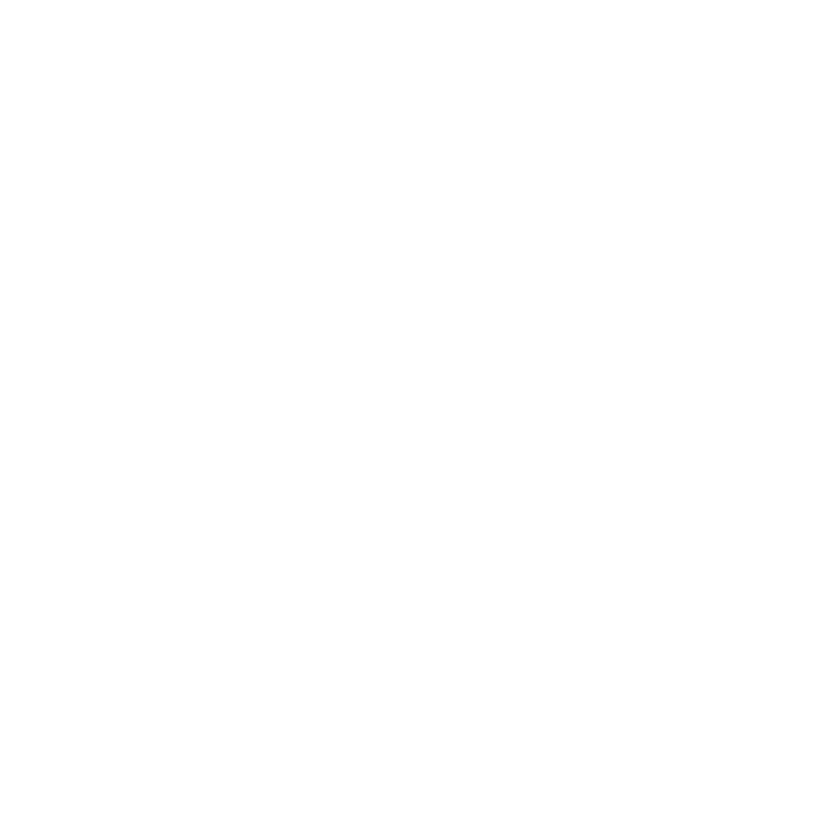

In [36]:
plot(test1$Daily, test1$EvalTotal, main="Metric performance in time (2019)", xlab="Time",ylab="K-WIN", sub=testcampaign, font.main=4, cex.sub=0.97)
lines(smooth.spline(test1$Daily, test1$EvalTotal))

dev.print(png, file = "example.png", width = 1076, height = 768, bg="transparent")
dev.off()

In [37]:
sum(inDB$Platform.Cost....)

[1] 9047882

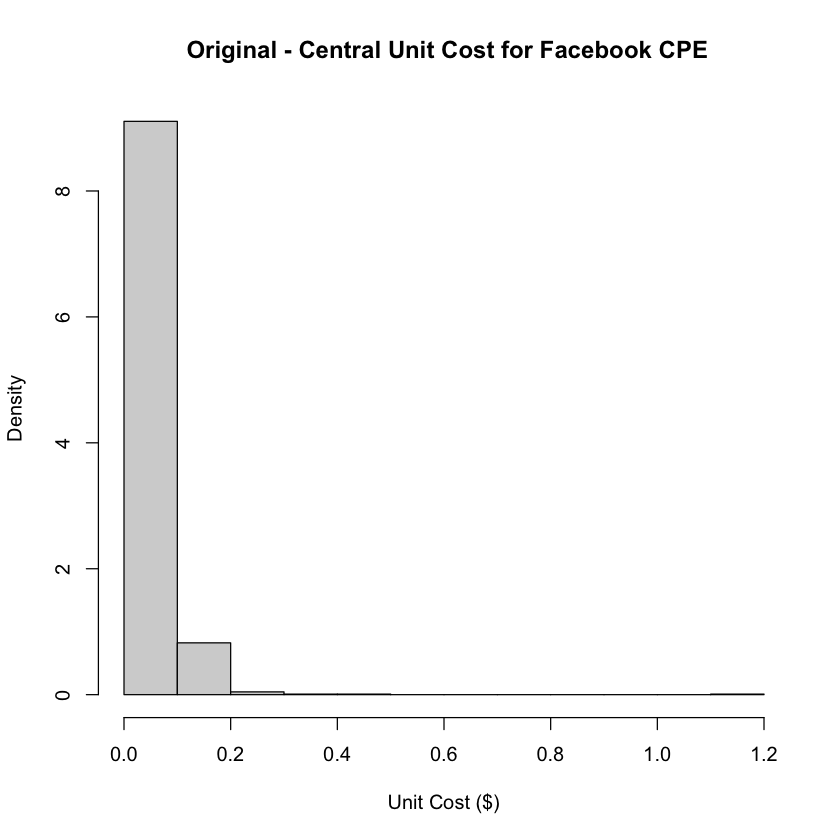

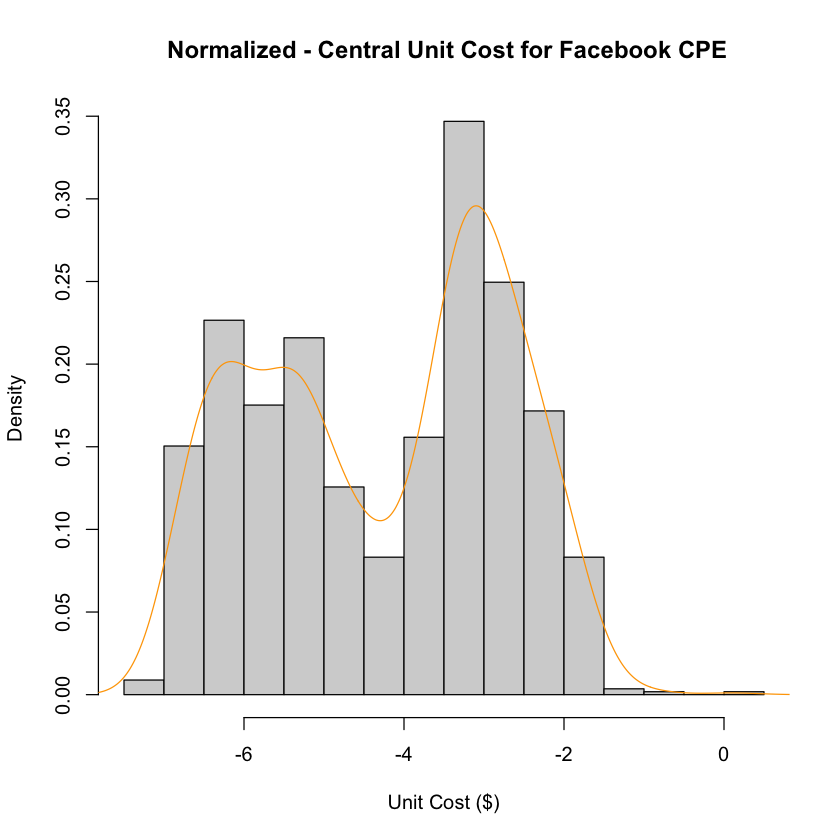

In [38]:
hist(inDB[Datasource %like% "Facebook" & Cost.Type == "CPE"]$Unit.Cost, prob=TRUE, main=" Original - Central Unit Cost for Facebook CPE", xlab="Unit Cost ($)")
hist(log(inDB[Datasource %like% "Facebook" & Cost.Type == "CPE"]$Unit.Cost), prob=TRUE, main=" Normalized - Central Unit Cost for Facebook CPE", xlab="Unit Cost ($)")
lines(density(log(inDB[Datasource %like% "Facebook" & Cost.Type == "CPE"]$Unit.Cost)), col="orange")

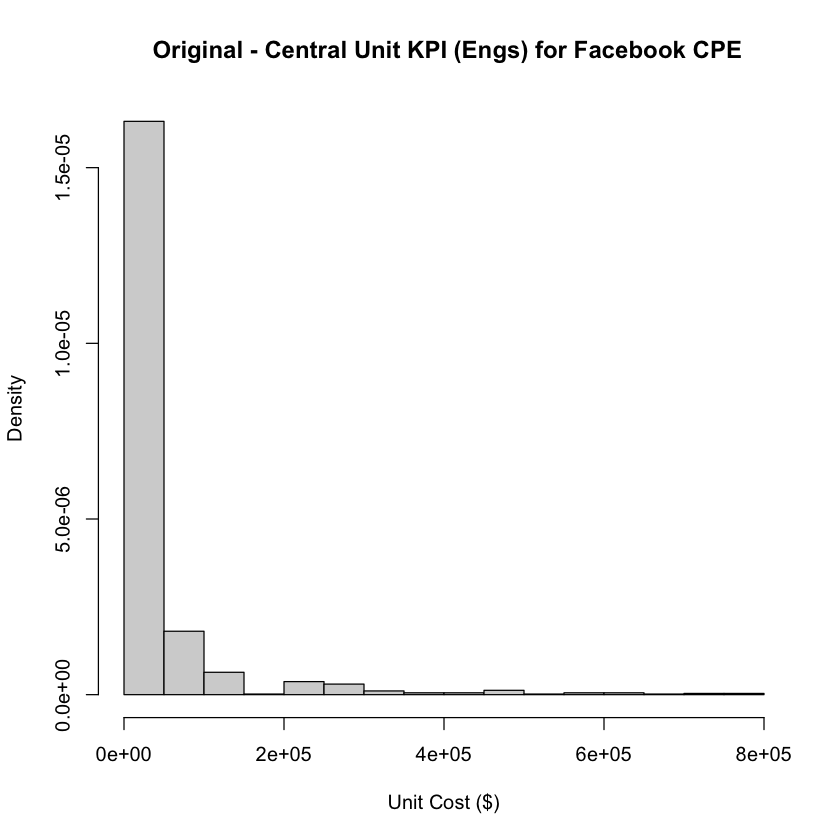

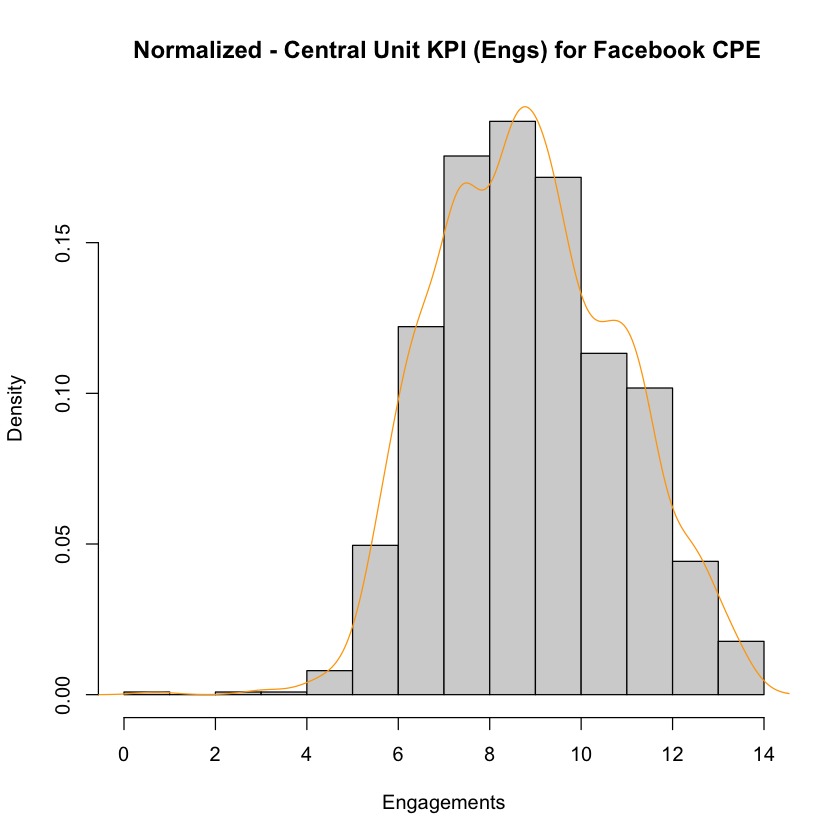

In [39]:
hist(inDB[Datasource %like% "Facebook" & Cost.Type == "CPE"]$Unit.KPI, prob=TRUE, main=" Original - Central Unit KPI (Engs) for Facebook CPE", xlab="Unit Cost ($)")
hist(log(inDB[Datasource %like% "Facebook" & Cost.Type == "CPE"]$Unit.KPI), prob=TRUE, main=" Normalized - Central Unit KPI (Engs) for Facebook CPE", xlab="Engagements")
lines(density(log(inDB[Datasource %like% "Facebook" & Cost.Type == "CPE"]$Unit.KPI)), col="orange")

In [40]:
median(presDB$Eval)*0.7
median(presDB$Eval)*1.3

[1] 0.4855529

[1] 0.9017412

In [41]:
finalDB[Campaign.Name %like% "CPV", .(.N), by=Campaign.Name]

Campaign.Name,N
<chr>,<int>
MCMMIA_2019_MEX_KELLOGGS_MASTERBRAND_SEASONAL_CEREBRO_FACEBOOK_FACEBOOK_VIDEOVIEWS_CPV_ENERO,1
MCMMIA_2019_MEX_KELLOGGS_MASTERBRAND_SEASONAL_CEREBRO_FACEBOOK_INSTAGRAM_VIDEOVIEWS_CPV_ENERO,1
MCMMIA_2019_MEX_KELLOGGS_SPECIALK_SEASONAL_TOTEBAGS_FACEBOOK_FACEBOOK_VIDEOVIEWS_CPV_ENERO,1
MCMMIA_2019_MEX_KELLOGGS_SPECIALK_SEASONAL_TOTEBAGS_FACEBOOK_INSTAGRAM_VIDEOVIEWS_CPV_ENERO,1
MCMMIA_2019_CENAM_PRINGLES_PRINGLES_SEASONAL_MUSIC_FACEBOOK_FACEBOOKANDINSTAGRAM_VIDEOVIEWS_CPV_EVENINGME,3
MCMMIA_2019_LATAM_PRINGLES_PRINGLES_SEASONAL_MUSIC_FACEBOOK_FACEBOOKANDINSTAGRAM_VIDEOVIEWS_CPV_EVENINGME,3
MCMMIA_2019_MEX_PRINGLES_PRINGLES_SEASONAL_MUSIC_FACEBOOK_FACEBOOKANDINSTAGRAM_VIDEOVIEWS_CPV_EVENINGME,3
MCMMIA_2019_MEX_KELLOGGS_MASTERBRAND_SEASONAL_RICEKRISPIES_FACEBOOK_FACEBOOK_VIDEOVIEWS_CPV_AGO,1
MCMMIA_2019_MEX_KELLOGGS_MASTERBRAND_SEASONAL_RICEKRISPIES_FACEBOOK_INSTAGRAM_VIDEOVIEWS_CPV_AGO,1


In [42]:
finalDB[Campaign.Name=="MCMMIA_2020_CRI_Kelloggs_Pringles_Seasonal_Google_Youtube_MovimientoPringles_PlacementsVideos_CPV_EveningMe"][order(Month)]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Datasource,Month,Country,Cost.Type,Brand,Campaign.Name,Cost.KPI,N,Platform.Cost,Impressions,⋯,Central.Impressions,Central.Video.Completions,Central.Video.Views,Eval1,Eval2,Eval3,Eval4,Eval5,Eval6,EvalTotal
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [43]:
brands = levels(finalDB[, .(.N), by="Brand"]$Brand)

for (b in brands){
    write.csv(finalDB[Brand == b, c("Datasource","Country", "Cost.Type", "Brand", "Campaign.Name", "EvalTotal")][order(-EvalTotal)], paste(b,".csv"), row.names=FALSE)
    print(b)
}

In [44]:
levels(finalDB[, .(.N), by="Brand"])

NULL